# diamonds-price-prediction

Diamonds Price by their size and other attributes

In [1]:
!pip install opendatasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import jovian
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
dataset_url = "https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset"

In [4]:
od.download(dataset_url)

100%|██████████| 557k/557k [00:00<00:00, 837kB/s]

In [5]:
diamond_df = pd.read_csv("/content/diamonds-price-dataset/diamonds.csv")

In [6]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [8]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
input_df = diamond_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']].copy()
input_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [10]:
target_df = diamond_df['price'].copy()
target_df

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

In [11]:
numeric_cols = input_df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols

['carat', 'depth', 'table', 'x', 'y', 'z']

In [12]:
input_df[['cut', 'color', 'clarity']].nunique()

cut        5
color      7
clarity    8
dtype: int64

In [13]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(input_df[['cut', 'color', 'clarity']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [14]:
encoded_cols = list(encoder.get_feature_names_out(['cut', 'color', 'clarity']))
len(encoded_cols)

20

In [15]:
input_df[encoded_cols] = encoder.transform(input_df[['cut', 'color', 'clarity']])

In [16]:
input_df = input_df[numeric_cols + encoded_cols]

In [17]:
input_df

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,5.75,5.76,3.50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.72,63.1,55.0,5.69,5.75,3.61,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.70,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


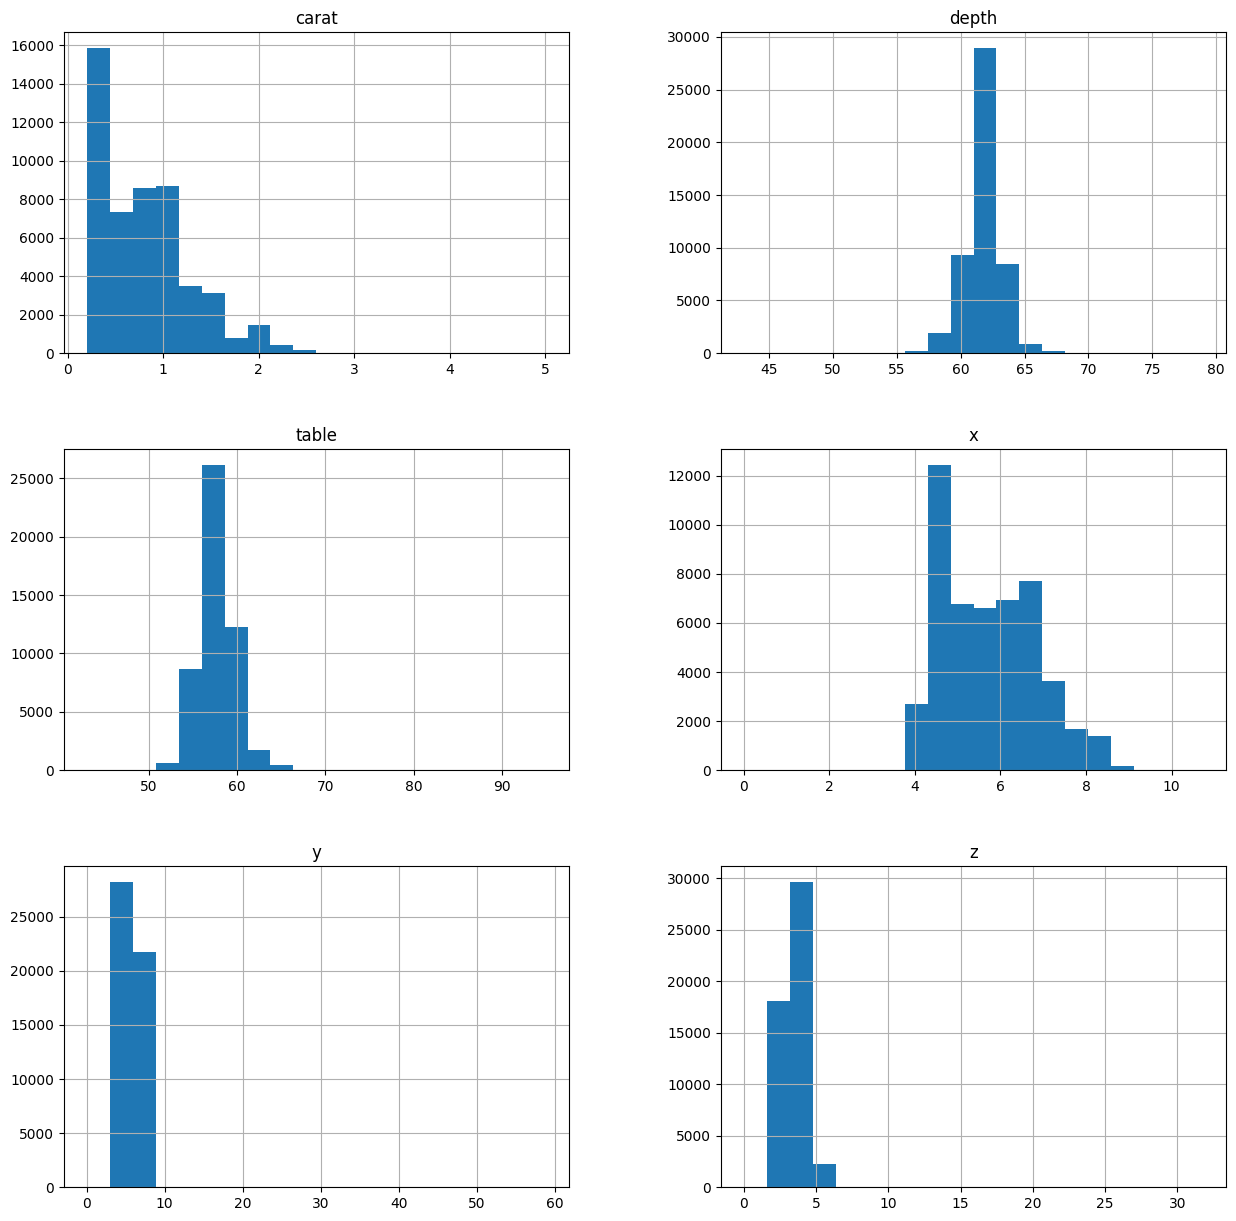

In [18]:
input_df[numeric_cols].hist(bins=20, figsize=(15,15))
plt.show()

# Correlation

<ipython-input-19-f19f1bfa4dfa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(diamond_df.corr())
<ipython-input-19-f19f1bfa4dfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(diamond_df.corr())


          carat     depth     table     price         x         y         z
carat  1.000000  0.027734  0.183639  0.921804  0.975037  0.950035  0.952700
depth  0.027734  1.000000 -0.293012 -0.012731 -0.025563 -0.029809  0.094337
table  0.183639 -0.293012  1.000000  0.129848  0.197198  0.185248  0.153161
price  0.921804 -0.012731  0.129848  1.000000  0.884919  0.864393  0.860963
x      0.975037 -0.025563  0.197198  0.884919  1.000000  0.972977  0.970122
y      0.950035 -0.029809  0.185248  0.864393  0.972977  1.000000  0.950030
z      0.952700  0.094337  0.153161  0.860963  0.970122  0.950030  1.000000


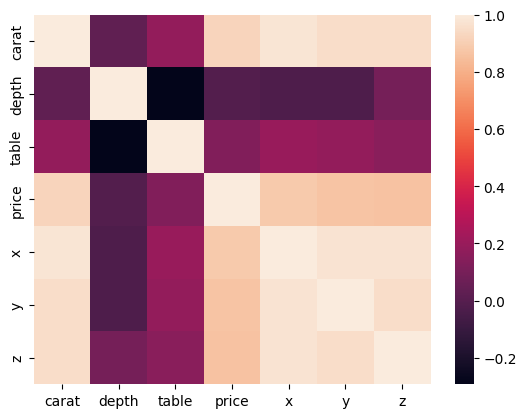

In [19]:
print(diamond_df.corr())
dataplot = sns.heatmap(diamond_df.corr())

# Train-Test Data Split:

In [20]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_df,
                                                                        target_df,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [21]:
train_inputs

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
39087,0.50,63.6,55.0,5.06,5.03,3.21,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30893,0.35,60.2,57.0,4.61,4.56,2.76,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45278,1.01,64.5,54.0,6.31,6.22,4.03,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,1.01,63.2,59.0,6.27,6.35,3.99,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13653,1.23,60.6,57.0,6.98,6.94,4.22,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.00,61.9,56.0,6.36,6.41,3.95,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44732,0.52,61.6,54.0,5.17,5.22,3.20,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38158,0.40,62.5,60.0,4.72,4.66,2.93,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,0.73,61.4,56.0,5.79,5.81,3.56,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
val_inputs

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33553,0.61,61.2,57.2,5.44,5.49,3.34,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9427,0.91,64.1,60.0,6.11,6.06,3.90,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,0.77,62.2,56.0,5.83,5.88,3.64,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12447,1.13,60.7,58.0,6.72,6.75,4.09,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39489,0.32,63.1,55.0,4.33,4.36,2.74,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,0.30,60.8,58.0,4.31,4.34,2.63,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25079,0.32,62.4,57.0,4.34,4.38,2.72,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18707,1.41,61.2,60.0,7.17,7.21,4.40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15200,1.20,62.3,57.0,6.78,6.76,4.22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_targets

39087    1286
30893     827
45278    2036
16398    7137
13653    5951
         ... 
11284    5197
44732    1958
38158    1200
860      2886
15795    6810
Name: price, Length: 40000, dtype: int64

In [24]:
val_targets

33553     931
9427     4744
199      2781
12447    5531
39489     505
         ... 
28567     742
25079     645
18707    8654
15200    6569
5857     4036
Name: price, Length: 10000, dtype: int64

# LinearRegression: Ridge Regressor

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model1 = Ridge()
model1.fit(train_inputs, train_targets)
train_prediction1 = model1.predict(train_inputs)
print(train_prediction1)

train_rmse = mean_squared_error(train_targets, train_prediction1, squared = False)
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

val_prediction1 = model1.predict(val_inputs)
print(val_prediction1)

val_rmse = mean_squared_error(val_targets, val_prediction1, squared = False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

weights = model1.coef_
print(weights)

weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weights': weights
}).sort_values('weights', ascending = False)
print(weights_df)

impact_val = max(map(abs, weights_df.weights))
print(impact_val)

[ 836.45628324  471.92857266 1315.08212439 ... 1592.85820102 3342.82070698
 6752.76045528]
The RMSE loss for the training set is $ 1142.0148340713554.
[-1844.73034002  5109.48403495  2917.41247467 ...  9227.85988061
  6633.22711246  4697.53685271]
The RMSE loss for the validation set is $ 1089.4098414514363.
[ 1.11731256e+04 -6.13857862e+01 -2.66865862e+01 -9.81950031e+02
  7.11114808e+01 -1.35478822e+02 -5.77730196e+02 -8.73776833e+00
  2.55623577e+02  1.82172877e+02  1.48671510e+02  8.39267093e+02
  6.16091895e+02  5.53614999e+02  3.43495695e+02 -1.61994230e+02
 -6.38032509e+02 -1.55244294e+03 -3.79849915e+03  1.55253230e+03
 -1.57695285e+02 -1.11928433e+03  7.49759885e+02  4.44961666e+02
  1.20119117e+03  1.12703374e+03]
          columns       weights
0           carat  11173.125610
19     clarity_IF   1552.532298
24   clarity_VVS1   1201.191170
25   clarity_VVS2   1127.033745
11        color_D    839.267093
22    clarity_VS1    749.759885
12        color_E    616.091895
13        

# DecisionTreesRegressor

R-squared:  0.9999958796528535
MSE:  542127.907025
RMSE:  736.2933566351119


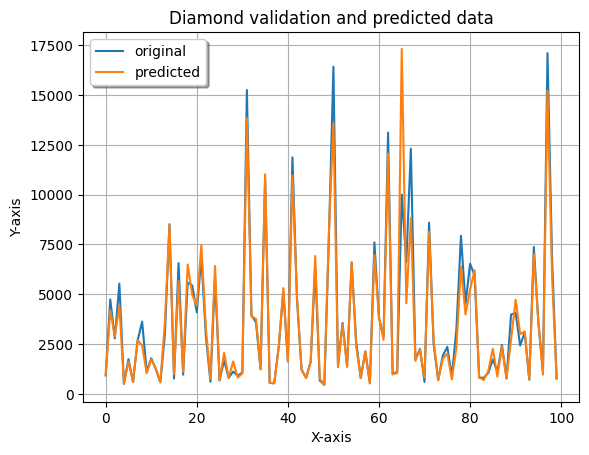

In [26]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state=42)
model2.fit(train_inputs, train_targets)
score = model2.score(train_inputs, train_targets)
print("R-squared: ", score)

val_prediction2 = model2.predict(val_inputs)
mse = mean_squared_error(val_targets, val_prediction2)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(val_targets))
plt.plot(x_ax[:100], val_targets[:100], label="original")
plt.plot(x_ax[:100], val_prediction2[:100], label="predicted")
plt.title("Diamond validation and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()

print('Parameters currently in use:\n')
ppi = pprint.PrettyPrinter(indent = 4)
ppi.pprint(model3.get_params())


Parameters currently in use:

{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'criterion': 'squared_error',
    'max_depth': None,
    'max_features': 1.0,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
ppo = pprint.PrettyPrinter(indent = 4)
ppo.pprint(random_grid)


{   'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [29]:
%%time
model3_random = RandomizedSearchCV(estimator = model3,
                               param_distributions = random_grid,
                               n_iter = 1,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

model3_random.fit(train_inputs, train_targets)

print("Train R-squared score: ",model3_random.score(train_inputs, train_targets))
print("Validation R-squared score: ",model3_random.score(val_inputs, val_targets))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Train R-squared score:  0.9876990712787025
Validation R-squared score:  0.9796855355374168
CPU times: user 13.3 s, sys: 227 ms, total: 13.5 s
Wall time: 55.6 s


n_iter controls the number of different combinations to try, and cv which is the number of folds to use for cross validation.

More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.
Performance vs time is one of the most fundamental trade-off.


In [30]:
ppo.pprint(model3_random.best_params_)

{   'bootstrap': True,
    'max_depth': 50,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 200}


         features  importance
4               y    0.261950
0           carat    0.255811
3               x    0.217960
5               z    0.167638
21    clarity_SI2    0.014280
18     clarity_I1    0.009241
17        color_J    0.008280
25   clarity_VVS2    0.007140
20    clarity_SI1    0.006510
24   clarity_VVS1    0.005629
16        color_I    0.005580
19     clarity_IF    0.005158
1           depth    0.004241
2           table    0.003839
22    clarity_VS1    0.003750
23    clarity_VS2    0.003627
11        color_D    0.003287
15        color_H    0.003092
12        color_E    0.002936
13        color_F    0.002928
14        color_G    0.002920
8       cut_Ideal    0.001742
9     cut_Premium    0.000932
6        cut_Fair    0.000855
7        cut_Good    0.000350
10  cut_Very Good    0.000324


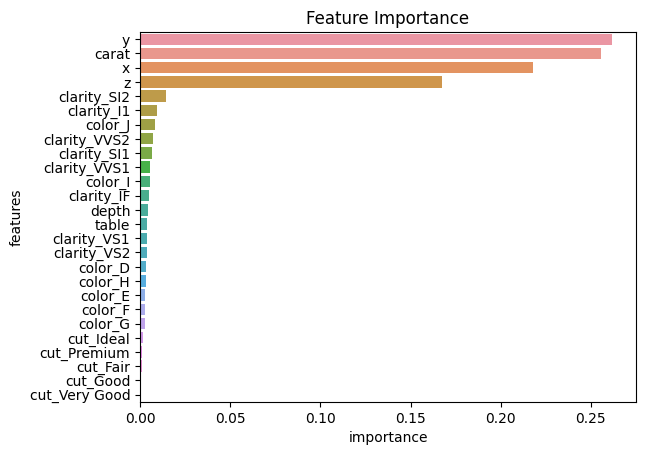

In [31]:

importance_df = pd.DataFrame({
    'features': train_inputs.columns,
    'importance': model3_random.best_estimator_.feature_importances_
}).sort_values('importance', ascending = False)

print(importance_df)
plt.title('Feature Importance')
sns.barplot(data = importance_df, x = 'importance', y = 'features');


# Hyperparameters Tuning